## Correlation

I will demonstrate how to select features based on correlation using 2 procedures. The first one is a brute force function that finds correlated features without any further insight. The second procedure finds groups of correlated features. Often, more than 2 features are correlated with each other. We can find groups of 3, 4 or more features that are correlated. By identifying these groups, we can then select from each group, which feature we want to keep, and which ones we want to remove.

I will use the Paribas claims dataset from Kaggle.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

In [2]:
file="D:\\Machine Learning_Class\\Feature Selection\\Data\\bnp-paribas-cardif-claims-management\\paribas.csv"
data=pd.read_csv(file)
data=pd.read_csv(file, sep = ",",nrows=50000)
data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [3]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess whether they are correlated with other features

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(50000, 114)

### Important

In all feature selection procedures, it is good practice to select the features by examining only the training set. And this is to avoid overfit.

In [4]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target', 'ID'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 112), (15000, 112))

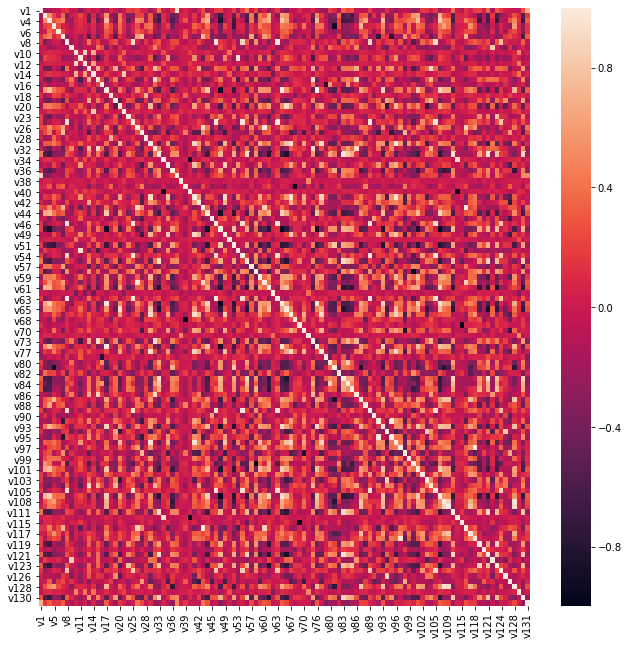

In [5]:
# visualise correlated features
# I will build the correlation matrix, which examines the 
# correlation of all features (for all possible feature combinations)
# and then visualise the correlation matrix using seaborn

corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

This approach looks to identify groups of highly correlated features. And then, we can make further investigation within these groups to decide which feature we keep and which one we remove.

In [6]:
# load dataset
file="D:\\Machine Learning_Class\\Feature Selection\\Data\\bnp-paribas-cardif-claims-management\\paribas.csv"
data=pd.read_csv(file)
data=pd.read_csv(file, sep = ",",nrows=50000)
data.head()

# select numerical variables
data = data[numerical_vars]

# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target', 'ID'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

In [7]:
# build a dataframe with the correlation between features
# remember that the absolute value of the correlation
# coefficient is important and not the sign

corrmat = X_train.corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.2]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head()

,feature1,feature2,corr
0,v100,v58,0.997974
1,v58,v100,0.997974
2,v115,v69,0.993229
3,v69,v115,0.993229
4,v17,v76,0.992511


In [8]:
# find groups of correlated features

grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 10 correlated groups
out of 112 total features


In [9]:
# now we can visualise each group. We see that some groups contain
# only 2 correlated features, some other groups present several features 
# that are correlated among themselves.

for group in correlated_groups:
    print(group)
    print()

     feature1 feature2      corr
0        v100      v58  0.997974
506      v100      v85  0.682594
654      v100      v61  0.635831
811      v100     v123  0.601866
916      v100      v13  0.580442
958      v100       v2  0.572018
1010     v100      v89  0.563895
1038     v100      v25  0.558575
1060     v100     v130  0.555980
1080     v100     v119  0.553369
1110     v100      v63  0.547985
1131     v100      v46  0.545431
1146     v100      v54  0.543270
1184     v100       v8  0.539096
1186     v100      v82  0.539085
1195     v100      v83  0.537687
1314     v100     v105  0.521585
1364     v100      v33  0.512729
1399     v100      v57  0.508588
1514     v100     v102  0.493692
1516     v100     v121  0.493598
1578     v100     v124  0.487394
1588     v100      v55  0.486011
1685     v100     v111  0.472713
1924     v100     v104  0.442117
1995     v100     v118  0.435178
2019     v100     v106  0.433098
2102     v100       v7  0.425245
2173     v100       v4  0.417874
2278     v

In [10]:
# we can now investigate further features within one group.
# let's for example select group 3

group = correlated_groups[2]
group

,feature1,feature2,corr
4,v17,v76,0.992511
9,v17,v64,0.982145
107,v17,v48,0.910103
130,v17,v93,0.887841
174,v17,v106,0.854995
218,v17,v44,0.818050
243,v17,v101,0.800001
288,v17,v4,0.773981
415,v17,v128,0.717698
425,v17,v51,0.714758


In [11]:
# we could select the features with less missing data
# like this:

for feature in list(group.feature2.unique())+['v17']:
    print(X_train[feature].isnull().sum())

15275
15275
15275
15288
15275
15275
15275
15275
14942
15562
14942
14942
14951
14942
15275
14942
15288
15275
15288
15288
15291
15288
15291
15288
15562
15288
15292
15275
15288
14942
15293
15290
15563
15291
15288
15292
15290
15563
14942
15756
15288
15288
15290
15288
15290
15292
15288
15293
15308
15288
15292
15560
15288
15288
15288
15288
15288
15288
15288
15288
14947
15275


All features show similar number of missing data in this case.

Alternatively, we could build a machine learning algorithm using all the features from the above list, and select the more predictive one.

In [12]:
from sklearn.ensemble import RandomForestClassifier

features = list(group.feature2.unique())+['v17']
rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
rf.fit(X_train[features].fillna(0), y_train)

RandomForestClassifier(max_depth=4, n_estimators=200, random_state=39)

In [13]:
# we get the feature importance attributed by the 
# random forest model 

importance = pd.concat(
    [pd.Series(features),
     pd.Series(rf.feature_importances_)], axis=1)

importance.columns = ['feature', 'importance']
importance.sort_values(by='importance', ascending=False)

,feature,importance
24,v123,0.056906
32,v119,0.046490
13,v36,0.040025
15,v81,0.034180
9,v51,0.034020
2,v48,0.032167
34,v99,0.024741
26,v130,0.024310
52,v6,0.024229
37,v85,0.024167


In this case, feature v48 shows the higher importance according to random forests. Then, I would select v48, and remove all the remaining features from this group from the dataset.

**Note**

None of the 2 procedures for removing correlated features are perfect, and some correlated features may escape the loops of code. So it might be worthwhile to check that after removing the correlated features, there are no correlated features left in the dataset. If there are, repeat the procedure to remove the remaining ones.

